# Cargando Audio

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Uchile_Sonido/ML"

'00 - Introducción al aprendizaje de máquina'
'01 - Fundamentos matemáticos'
'02 - Introducción a la programación en python'
'03 - Análisis y visualización de datos'
'04 - Modelos clásicos de machine learning: teoría e implementación'
'05 - Introducción a modelos avanzados'
'06 - Proyectos'
 README.md
 Recursos


In [ ]:
!ls "/content/drive/MyDrive/Uchile_Sonido/ML/02 - Introducción a la programación en python"

audio.wav			      tutorial_python_ciclos_04.ipynb
intro_python_numpy_DLAI_02.ipynb      tutorial_python_estructuras_02.ipynb
intro_sintaxis_python_numpy_01.ipynb  tutorial_python_funciones_03.ipynb
tone_wav_440.wav		      tutorial_python_sox_and_ffmpeg_06.ipynb
tutorial_python_audio_05.ipynb	      tutorial_python_strings_00.ipynb


In [ ]:
%cd "/content/drive/MyDrive/Uchile_Sonido/ML/02 - Introducción a la programación en python"

/content/drive/MyDrive/Uchile_Sonido/ML/02 - Introducción a la programación en python


In [ ]:
import librosa
x, sr = librosa.load('audio.wav')

In [ ]:
x

array([-0.00799639, -0.01183389, -0.01044551, ..., -0.00442595,
       -0.00437187,  0.        ], dtype=float32)

Si hubiese algún error al cargar `librosa.load`, necesitas[instalar ffmpeg](https://librosa.github.io/librosa/install.html#ffmpeg).

In [ ]:
sr

22050

In [ ]:
help(librosa.load)

Help on function load in module librosa.core.audio:

load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
    Load an audio file as a floating point time series.
    
    Audio will be automatically resampled to the given rate
    (default ``sr=22050``).
    
    To preserve the native sampling rate of the file, use ``sr=None``.
    
    Parameters
    ----------
    path : string, int, pathlib.Path or file-like object
        path to the input file.
    
        Any codec supported by `soundfile` or `audioread` will work.
    
        Any string file paths, or any object implementing Python's
        file interface (e.g. `pathlib.Path`) are supported as `path`.
    
        If the codec is supported by `soundfile`, then `path` can also be
        an open file descriptor (int).
    
        On the contrary, if the codec is not supported by `soundfile`
        (for example, MP3), then `path` must be a file path (string or `pat

Observemos el largo y la frecuencia de muestreo

In [ ]:
print(x.shape)
print(sr)

(3038074,)
22050


# Visualicemos el audio

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

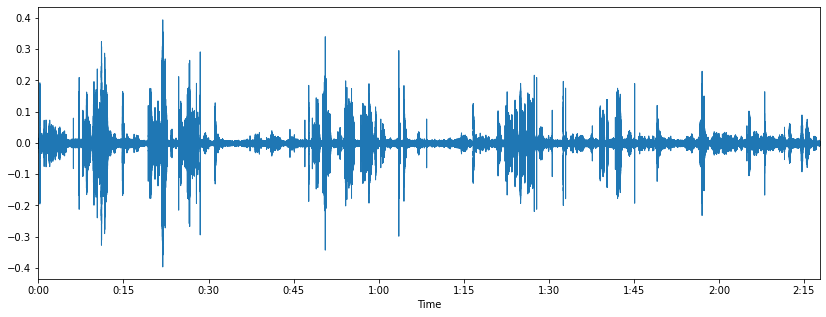

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Visualicemos el espectrograma [`librosa.display.specshow`](https://librosa.github.io/librosa/generated/librosa.display.specshow.html)

In [ ]:
help(librosa.stft)

Help on function stft in module librosa.core.spectrum:

stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, dtype=None, pad_mode='reflect')
    Short-time Fourier transform (STFT).
    
    The STFT represents a signal in the time-frequency domain by
    computing discrete Fourier transforms (DFT) over short overlapping
    windows.
    
    This function returns a complex-valued matrix D such that
    
    - ``np.abs(D[f, t])`` is the magnitude of frequency bin ``f``
      at frame ``t``, and
    
    - ``np.angle(D[f, t])`` is the phase of frequency bin ``f``
      at frame ``t``.
    
    The integers ``t`` and ``f`` can be converted to physical units by means
    of the utility functions `frames_to_sample` and `fft_frequencies`.
    
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)], real-valued
        input signal
    
    n_fft : int > 0 [scalar]
        length of the windowed signal after padding with zeros.
        The number of r

In [ ]:
int(sr*0.005)

110

In [ ]:
X = librosa.stft(x,win_length=2048) # no funcionó con 0.1, 0.01, 0.005 pero el sr = 22050
Xdb = librosa.amplitude_to_db(abs(X))

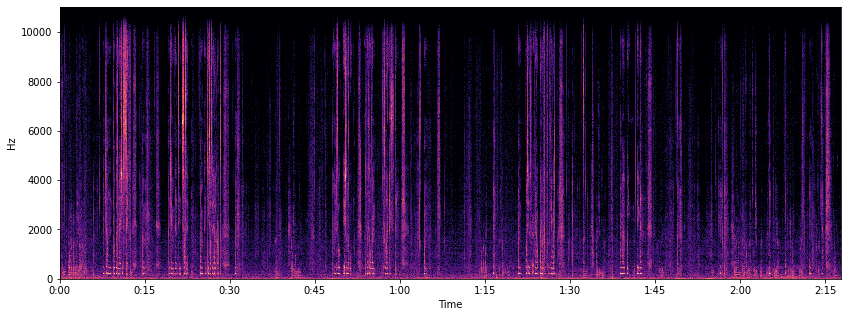

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
X = librosa.stft(x,win_length=128) # no aguantó 128 win_length (se me fue la RAM)
Xdb = librosa.amplitude_to_db(abs(X))

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

# Reproduzcamos Audio

Utilizando [`IPython.display.Audio`](http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio) podemos reproducir audio

In [ ]:
import IPython.display as ipd
ipd.Audio('audio.wav') # load a local WAV file

# Escribir Audio

In [ ]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

In [ ]:
ipd.Audio(x, rate=sr) # load a NumPy array

[`librosa.output.write_wav`](https://librosa.github.io/librosa/generated/librosa.output.write_wav.html#librosa.output.write_wav)

In [ ]:
import numpy as np
import soundfile as sf

# Write out audio as 24bit PCM WAV
sf.write('tone_wav_440.wav', x, sr, subtype='PCM_24')